In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
trial_df = pd.read_csv("/Users/morgancordray/Desktop/programming/UA-PHX-DATA-PT-08-2019-U-C/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/clinicaltrial_data.csv")
drug_df = pd.read_csv("/Users/morgancordray/Desktop/programming/UA-PHX-DATA-PT-08-2019-U-C/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/mouse_drug_data.csv")

# Combine the data into a single dataset
df = pd.merge(trial_df, drug_df, on= "Mouse ID")

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
#### Tumor Response to Treatment ######
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

df2 = df.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame

# Preview DataFrame
df2.head(15)

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#del df2["Metastatic Sites"]
df2["error"] = df2.sem(axis = 1, skipna = False)
# Convert to DataFrame

# Preview DataFrame
df2.reset_index()
#time = df2["Timepoint"]


,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,error
0,Capomulin,0,45.000000,0.000000,22.500000
1,Capomulin,5,44.266086,0.160000,22.053043
2,Capomulin,10,43.084291,0.320000,21.382145
3,Capomulin,15,42.064317,0.375000,20.844659
4,Capomulin,20,40.716325,0.652174,20.032076
...,...,...,...,...,...
95,Zoniferol,25,55.432935,1.687500,26.872717
96,Zoniferol,30,57.713531,1.933333,27.890099
97,Zoniferol,35,60.089372,2.285714,28.901829
98,Zoniferol,40,62.916692,2.785714,30.065489


In [4]:
# Minor Data Munging to Re-Format the Data Frames
#del df2["Metastatic Sites"]
#del df2["error"]
reformated = df2.unstack(level = 0,fill_value=0)
# Preview that Reformatting worked


reformated_df = reformated[[('Tumor Volume (mm3)', 'Ketapril'),('Tumor Volume (mm3)', 'Capomulin'),('Tumor Volume (mm3)', 'Infubinol'),('Tumor Volume (mm3)', 'Placebo')]]
reformated_df = reformated_df.reset_index()
time = reformated_df["Timepoint"]


In [5]:
# Generate the Plot (with Error Bars)
yerror = reformated_df.sem().mean()

reformated_df

yerror


2.6229610621604773

In [6]:
Ksem = reformated_df['Tumor Volume (mm3)', 'Ketapril'].sem()
Csem =reformated_df['Tumor Volume (mm3)', 'Capomulin'].sem()
Isem = reformated_df['Tumor Volume (mm3)', 'Infubinol'].sem()
Psem = reformated_df['Tumor Volume (mm3)', 'Placebo'].sem()
error = [Ksem, Csem, Isem, Psem]
error

[2.671727801269364, 0.9709032345000089, 2.2059693464844656, 2.4790693897668596]

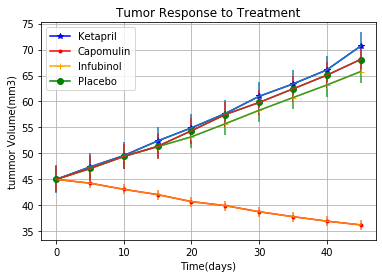

In [7]:
#reformated_df = reformated_df.reset_index()
#.plot(kind="line", marker =".")
#reformated_df = reformated_df.reset_index()

plt.plot(time,reformated_df['Tumor Volume (mm3)', 'Ketapril'],color="blue", marker ="*", label="Ketapril")
plt.plot(time,reformated_df['Tumor Volume (mm3)', 'Capomulin'],color= "red",marker =".", label="Capomulin")
plt.plot(time,reformated_df['Tumor Volume (mm3)', 'Infubinol'],color="orange", marker ="+", label="Infubinol")
plt.plot(time,reformated_df['Tumor Volume (mm3)', 'Placebo'],color="green", marker ="o", label="Placebo")
plt.errorbar(time,reformated_df['Tumor Volume (mm3)', 'Ketapril'],yerr=Ksem)
plt.errorbar(time,reformated_df['Tumor Volume (mm3)', 'Capomulin'],yerr=Csem)
plt.errorbar(time,reformated_df['Tumor Volume (mm3)', 'Infubinol'],yerr=Isem)
plt.errorbar(time,reformated_df['Tumor Volume (mm3)', 'Placebo'],yerr=Psem)
plt.grid()
plt.xlabel("Time(days)")
plt.ylabel("tummor Volume(mm3)")
plt.title("Tumor Response to Treatment")
plt.legend()
plt.savefig("Tumor.png")
# Save the Figure
plt.show()

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = df[["Drug","Timepoint","Metastatic Sites"]]


#df
# Convert to DataFrame
mean_met = mean_met.groupby(["Drug","Timepoint"]).mean()
# Preview DataFrame
mean_met.head(15)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_met = mean_met.sem()
# Convert to DataFrame

# Preview DataFrame
SE_met

Metastatic Sites    0.090044
dtype: float64

In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_reformated = mean_met.unstack(level = 0,fill_value=0)
met_reformated
Kmsem = met_reformated['Metastatic Sites', 'Ketapril'].sem()
Cmsem = met_reformated['Metastatic Sites', 'Capomulin'].sem()
Imsem = met_reformated['Metastatic Sites', 'Infubinol'].sem()
Pmsem = met_reformated['Metastatic Sites', 'Placebo'].sem()
# Preview that Reformatting worked


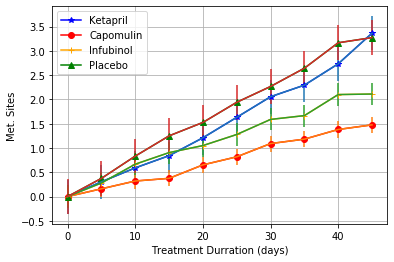

In [11]:
# Generate the Plot (with Error Bars)
met_reformated = met_reformated[[("Metastatic Sites","Ketapril"), ("Metastatic Sites","Capomulin"), ("Metastatic Sites","Infubinol"), ("Metastatic Sites","Placebo")]]
#met_reformated.plot(kind = "line", marker =".")
plt.plot(time, met_reformated[("Metastatic Sites","Ketapril")],color="blue", marker ="*", label="Ketapril")
plt.plot(time, met_reformated[("Metastatic Sites","Capomulin")],color="red", marker ="o", label="Capomulin")
plt.plot(time, met_reformated[("Metastatic Sites","Infubinol")],color="orange", marker ="+", label="Infubinol")
plt.plot(time, met_reformated[("Metastatic Sites","Placebo")],color="green", marker ="^", label="Placebo")
plt.errorbar(time,met_reformated['Metastatic Sites', 'Ketapril'],yerr=Kmsem)
plt.errorbar(time,met_reformated['Metastatic Sites', 'Capomulin'],yerr=Cmsem)
plt.errorbar(time,met_reformated['Metastatic Sites', 'Infubinol'],yerr=Imsem)
plt.errorbar(time,met_reformated['Metastatic Sites', 'Placebo'],yerr=Pmsem)
plt.grid()
plt.legend()
# Save the Figure
plt.xlabel("Treatment Durration (days)")
plt.ylabel("Met. Sites")
plt.savefig("Metsites.png")
# Show the Figure
plt.show()

In [12]:
#### Survival Rates ####
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = df.groupby(["Drug","Timepoint"]).agg({"Mouse ID":"count"})

# Convert to DataFrame

# Preview DataFrame
mice

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_reformated = mice.unstack(level = 1)
mice_reformated = mice_reformated.T
mice2 = mice_reformated
pct_change = mice_reformated.pct_change()
mice_reformated = mice_reformated[["Ketapril", "Capomulin", "Infubinol", "Placebo"]]

# Calculate the percent changes for each drug


# Display the data to confirm

# Preview the Data Frame
mice_reformated

Drug                Ketapril  Capomulin  Infubinol  Placebo
         Timepoint                                         
Mouse ID 0                25         25         25       25
         5                23         25         25       24
         10               22         25         21       24
         15               19         24         21       20
         20               19         23         20       19
         25               19         22         18       17
         30               18         22         17       15
         35               17         22         12       14
         40               15         21         10       12
         45               11         21          9       11

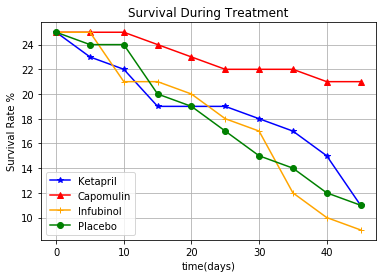

In [14]:
# Generate the Plot (Accounting for percentages)




ax1 =plt.plot(time, mice_reformated["Ketapril"], color="blue", marker="*",label="Ketapril")
ax2 =plt.plot(time, mice_reformated["Capomulin"], color="red", marker="^",label="Capomulin")
ax3 =plt.plot(time, mice_reformated["Infubinol"], color="orange", marker="+",label="Infubinol")
ax4 =plt.plot(time, mice_reformated["Placebo"], color="green", marker= "o",label="Placebo")
plt.xlabel("time(days)")
plt.ylabel("Survival Rate %")
plt.title("Survival During Treatment")
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("Survival.png")
# Show the Figure
plt.show()

In [15]:
#### Summary Bar Graph ######

# Calculate the percent changes for each drug
pct_change.sum()
# Display the data to confirm


Drug
Capomulin   -0.170599
Ceftamin    -0.617790
Infubinol   -0.923959
Ketapril    -0.752343
Naftisol    -0.614576
Placebo     -0.772434
Propriva    -1.180222
Ramicane    -0.216242
Stelasyn    -0.797732
Zoniferol   -0.547254
dtype: float64

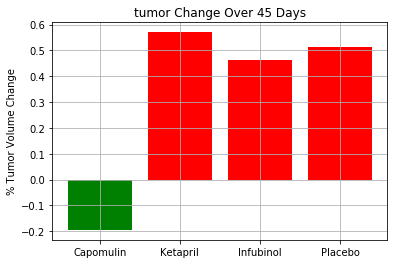

In [18]:
# Store all Relevant Percent Changes into a Tuple
x = ("Capomulin", -0.170599),("Ceftamin",-0.617790),("Infubinol",-0.923959),("Ketapril",-0.752343),("Naftisol",-0.614576),("Placebo",-0.772434),("Propriva",-1.180222),("Ramicane",-0.216242),("Stelasyn",-0.797732),("Zoniferol",-0.547254)
x
# Splice the data between passing and failing drugs
passing = reformated_df['Tumor Volume (mm3)', 'Capomulin'].iloc[0] - reformated_df['Tumor Volume (mm3)', 'Capomulin'].iloc[9]/ reformated_df['Tumor Volume (mm3)', 'Capomulin'].iloc[0]
passing
failing =[-(reformated_df['Tumor Volume (mm3)', 'Capomulin'].iloc[0] - reformated_df['Tumor Volume (mm3)', 'Capomulin'].iloc[9])/ reformated_df['Tumor Volume (mm3)', 'Capomulin'].iloc[0],-(reformated_df['Tumor Volume (mm3)', 'Ketapril'].iloc[0] - reformated_df['Tumor Volume (mm3)', 'Ketapril'].iloc[9])/ reformated_df['Tumor Volume (mm3)', 'Ketapril'].iloc[0],-(reformated_df['Tumor Volume (mm3)', 'Infubinol'].iloc[0] - reformated_df['Tumor Volume (mm3)', 'Infubinol'].iloc[9])/ reformated_df['Tumor Volume (mm3)', 'Infubinol'].iloc[0],-(reformated_df['Tumor Volume (mm3)', 'Placebo'].iloc[0] - reformated_df['Tumor Volume (mm3)', 'Placebo'].iloc[9])/reformated_df['Tumor Volume (mm3)', 'Placebo'].iloc[0]]

# Orient widths. Add labels, tick marks, etc.
objects = ("Capomulin", "Ketapril", "Infubinol", "Placebo")
y_pos = np.arange(len(objects))
 
plt.grid()
ax = plt.bar(y_pos,failing,color=("green","red","red","red"))
plt.xticks(y_pos, objects)
plt.title("tumor Change Over 45 Days")
plt.ylabel("% Tumor Volume Change")
rects = ax.patches

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure

plt.savefig("summarybar.png")
# Show the Figure
plt.show()